# Question 02:

## Part b

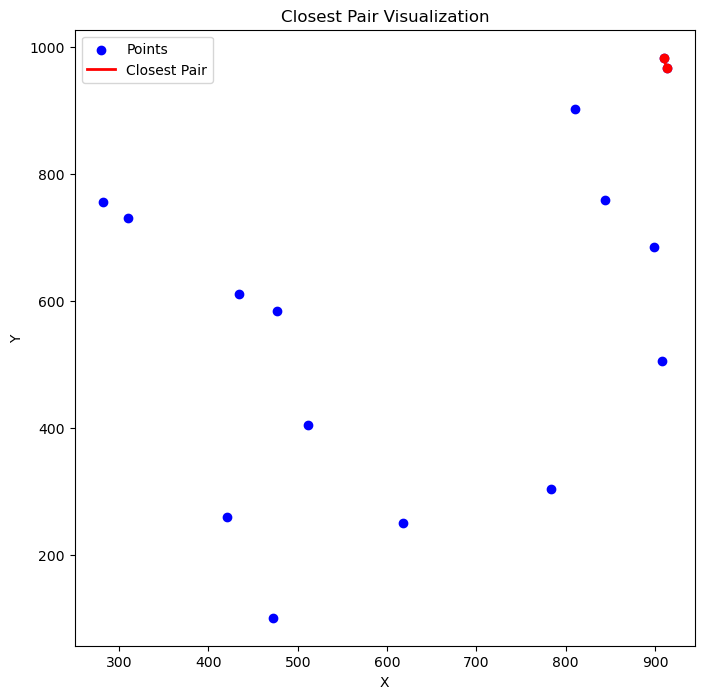

n = 10, Closest Pair Distance = (128.08408848945734, ((810.2172359965896, 902.1659504395827), (909.7462559682401, 982.7854760376531))), Runtime = 0.0000 seconds
n = 100, Closest Pair Distance = (11.728715574671, ((476.5309920093808, 89.82436119559367), (472.14271545271333, 100.7012080683658))), Runtime = 0.0010 seconds
n = 1000, Closest Pair Distance = (0.5251194270680762, ((66.35913103778523, 84.64313683307012), (65.83467727730097, 84.66956912011115))), Runtime = 0.0065 seconds
n = 10000, Closest Pair Distance = (0.08396463886213928, ((662.1659398463271, 763.2792704170844), (662.2080577914516, 763.351907455004))), Runtime = 0.1141 seconds
n = 100000, Closest Pair Distance = (0.018924292335420083, ((846.2808277569803, 530.7825750170592), (846.2646301510787, 530.7923610480959))), Runtime = 1.6166 seconds
n = 1000000, Closest Pair Distance = (0.0007841878056208649, ((527.928896698826, 233.26168579325136), (527.9285007093397, 233.2623626557494))), Runtime = 26.8709 seconds
n = 10000000, C

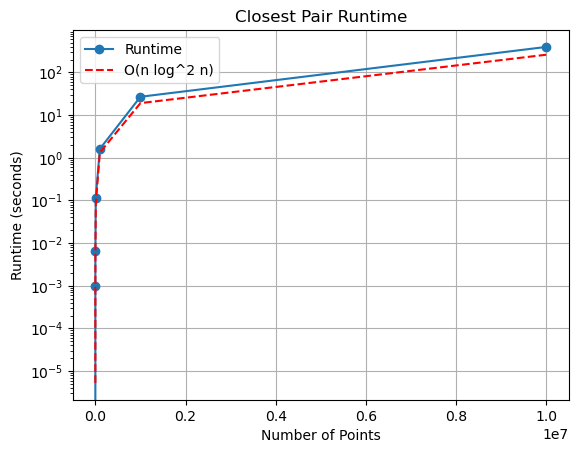

In [ ]:
import math
import random
import time
import matplotlib.pyplot as plt

# Function to calculate the Euclidean distance
def distance(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Brute force method for small sets of points
def brute_force(points):
    min_dist = float('inf')
    closest_pair = (None, None)
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            dist = distance(points[i], points[j])
            if dist < min_dist:
                min_dist = dist
                closest_pair = (points[i], points[j])
    return min_dist, closest_pair

# Custom merge sort function for sorting by y-coordinate
def merge_sort_y(points):
    if len(points) <= 1:
        return points
    mid = len(points) // 2
    left = merge_sort_y(points[:mid])
    right = merge_sort_y(points[mid:])
    return merge(left, right)

# Merge function used in merge sort
def merge(left, right):
    sorted_points = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i][1] < right[j][1]:  # Sort by y-coordinate
            sorted_points.append(left[i])
            i += 1
        else:
            sorted_points.append(right[j])
            j += 1
    sorted_points.extend(left[i:])
    sorted_points.extend(right[j:])
    return sorted_points

# Helper function for finding closest pair in the strip area
def closest_in_strip(strip, min_dist, closest_pair):
    strip_sorted_y = merge_sort_y(strip)  # Sort by y-coordinate within the strip
    for i in range(len(strip_sorted_y)):
        j = i + 1
        while j < len(strip_sorted_y) and (strip_sorted_y[j][1] - strip_sorted_y[i][1]) < min_dist:
            dist = distance(strip_sorted_y[i], strip_sorted_y[j])
            if dist < min_dist:
                min_dist = dist
                closest_pair = (strip_sorted_y[i], strip_sorted_y[j])
            j += 1
    return min_dist, closest_pair

# Main recursive function without initial presorting
def closest_pair_recursive(points):
    n = len(points)
    if n <= 3:
        return brute_force(points)

    # Sort points by x-coordinate
    # TODO: This can be avoided by passing the sorted points from the previous recursive call
    points_sorted_x = points
    mid = n // 2
    midpoint = points_sorted_x[mid][0]

    # Divide points into left and right halves
    P_left = points_sorted_x[:mid]
    P_right = points_sorted_x[mid:]
    
    # Sort left and right halves by y-coordinate within this recursive call using custom merge sort
    P_left_sorted_y = merge_sort_y(P_left)
    P_right_sorted_y = merge_sort_y(P_right)

    # Recursively find the smallest distance in each half
    dist_left, closest_pair_left = closest_pair_recursive(P_left_sorted_y)
    dist_right, closest_pair_right = closest_pair_recursive(P_right_sorted_y)

    # Find the minimum distance and corresponding closest pair across both halves
    if dist_left < dist_right:
        min_dist = dist_left
        closest_pair = closest_pair_left
    else:
        min_dist = dist_right
        closest_pair = closest_pair_right

    # Collect points within the min_dist of the dividing line for checking across the strip
    strip = [p for p in points_sorted_x if abs(p[0] - midpoint) < min_dist]
    min_dist, closest_pair = closest_in_strip(strip, min_dist, closest_pair)

    return min_dist, closest_pair

# Wrapper function to initiate the recursive closest-pair search
def closest_pair(points):
    return closest_pair_recursive(points)

# Generate random points for testing
def generate_random_points(n):
    # Add the reproducibility of the random points
    random.seed(0)
    return [(random.uniform(0, 1000), random.uniform(0, 1000)) for _ in range(n)]

# Visualization function
def visualize_closest_pair(points, closest_pair):
    plt.figure(figsize=(8, 8))
    # Plot all points
    x, y = zip(*points)
    plt.scatter(x, y, color='blue', label='Points')

    # Plot the closest pair in red
    if closest_pair[0] and closest_pair[1]:
        plt.plot([closest_pair[0][0], closest_pair[1][0]],
                 [closest_pair[0][1], closest_pair[1][1]], 'r-', linewidth=2, label='Closest Pair')
        plt.scatter([closest_pair[0][0], closest_pair[1][0]],
                    [closest_pair[0][1], closest_pair[1][1]], color='red')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title("Closest Pair Visualization")
    plt.show()

# Testing the visualization with 100 random points
n = 15
points = generate_random_points(n)
_, closest_pair_points = closest_pair(points)
visualize_closest_pair(points, closest_pair_points)

# Testing the runtime for different values of n
n_values = [10**i for i in range(1, 8)]  # 1024, 2048, 4096, 8192, 16384
runtimes = []

for n in n_values:
    points = generate_random_points(n)
    start_time = time.time()
    min_dist = closest_pair(points)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes.append(runtime)
    print(f"n = {n}, Closest Pair Distance = {min_dist}, Runtime = {runtime:.4f} seconds")

# Visualize the runtime results
plt.plot(n_values, runtimes, 'o-')
# plot the theoretical O(n log^2 n) line and scale it to fit the data
plt.plot(n_values, [n * math.log(n)**2 / 10**7 for n in n_values], 'r--')
# plt.plot(n_values, [n * math.log(n)**2 for n in n_values], 'r--')
plt.legend(['Runtime', 'O(n log^2 n)'])
plt.xlabel('Number of Points')
plt.ylabel('Runtime (seconds)')
plt.title('Closest Pair Runtime')
plt.grid()
# log-log plot to show the O(n log n) behavior
# plt.xscale('log')
plt.yscale('log')
plt.show()

# Question 3: 

## Part a

n = 50, Runtime (Divide and Conquer) = 0.0000 seconds


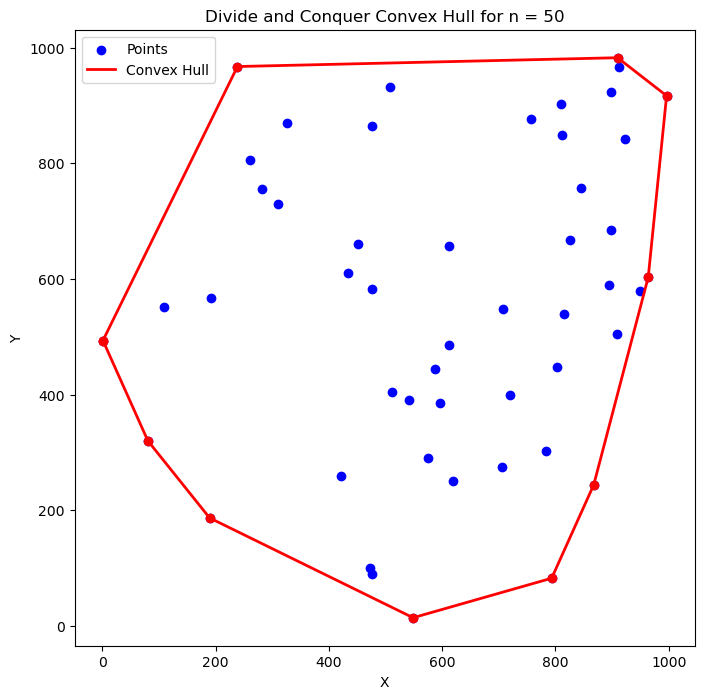

n = 500, Runtime (Divide and Conquer) = 0.0010 seconds
n = 5000, Runtime (Divide and Conquer) = 0.0070 seconds
n = 50000, Runtime (Divide and Conquer) = 0.0545 seconds
n = 500000, Runtime (Divide and Conquer) = 0.8831 seconds
n = 5000000, Runtime (Divide and Conquer) = 10.8528 seconds
n = 50000000, Runtime (Divide and Conquer) = 141.3813 seconds


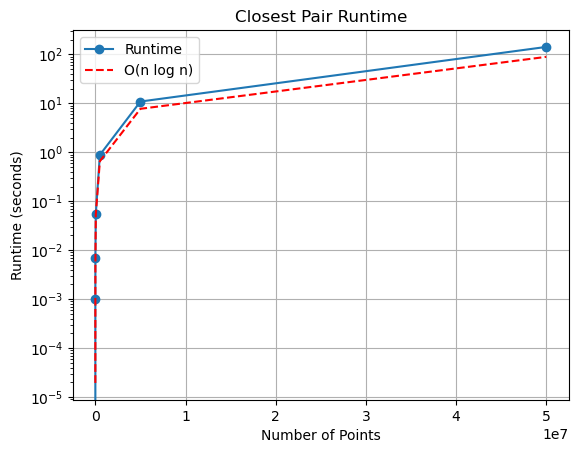

In [19]:
import random
import matplotlib.pyplot as plt
import time

# Generate random points in 2D space
def generate_random_points(n):
    random.seed(0)  # For reproducibility
    return [(random.uniform(0, 1000), random.uniform(0, 1000)) for _ in range(n)]

# Function to determine if three points make a counter-clockwise turn
def is_counter_clockwise(p, q, r):
    return (q[1] - p[1]) * (r[0] - q[0]) > (q[0] - p[0]) * (r[1] - q[1])

# Helper function to compute the upper hull
def compute_upper_hull(points):
    upper_hull = []
    for p in points:
        while len(upper_hull) >= 2 and not is_counter_clockwise(upper_hull[-2], upper_hull[-1], p):
            upper_hull.pop()
        upper_hull.append(p)
    return upper_hull

# Helper function to compute the lower hull
def compute_lower_hull(points):
    lower_hull = []
    for p in reversed(points):
        while len(lower_hull) >= 2 and not is_counter_clockwise(lower_hull[-2], lower_hull[-1], p):
            lower_hull.pop()
        lower_hull.append(p)
    return lower_hull

# Main function to compute convex hull using divide-and-conquer
def divide_and_conquer_convex_hull(points):
    points = sorted(points)  # Assume points are pre-sorted by x-coordinate
    upper_hull = compute_upper_hull(points)
    lower_hull = compute_lower_hull(points)
    return upper_hull[:-1] + lower_hull[:-1]  # Remove duplicate end points

# Visualization function for convex hull
def visualize_convex_hull(points, hull_points, title="Convex Hull"):
    plt.figure(figsize=(8, 8))
    # Plot all points
    x, y = zip(*points)
    plt.scatter(x, y, color='blue', label='Points')

    # Plot the convex hull
    hull_x, hull_y = zip(*hull_points + [hull_points[0]])  # Close the hull loop
    plt.plot(hull_x, hull_y, 'r-', linewidth=2, label='Convex Hull')
    plt.scatter(hull_x, hull_y, color='red')

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title(title)
    plt.show()

# Testing the divide-and-conquer convex hull with different n values
# Testing the runtime for different values of n
n_values = [5 * 10**i for i in range(1, 8)]  # 1024, 2048, 4096, 8192, 16384
runtimes_divide_conquer = []
count = 0
for n in n_values:
    points = generate_random_points(n)
    start_time = time.time()
    hull_points = divide_and_conquer_convex_hull(points)
    end_time = time.time()
    runtime = end_time - start_time
    runtimes_divide_conquer.append(runtime)
    count += 1
    print(f"n = {n}, Runtime (Divide and Conquer) = {runtime:.4f} seconds")
    if count == 1:
        visualize_convex_hull(points, hull_points, title=f"Divide and Conquer Convex Hull for n = {n}")

# Plot runtime complexity for divide-and-conquer approach
# Visualize the runtime results
plt.plot(n_values, runtimes_divide_conquer, 'o-')
# plot the theoretical O(n log^2 n) line and scale it to fit the data
plt.plot(n_values, [n * math.log(n) / 10**7 for n in n_values], 'r--')
# plt.plot(n_values, [n * math.log(n) 2 for n in n_values], 'r--')
plt.legend(['Runtime', 'O(n log n)'])
plt.xlabel('Number of Points')
plt.ylabel('Runtime (seconds)')
plt.title('Closest Pair Runtime')
plt.grid()
# log-log plot to show the O(n log n) behavior
# plt.xscale('log')
plt.yscale('log')
plt.show()

## Part b

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time
from itertools import combinations

def generate_random_points(n):
    """
    Generate n random points uniformly distributed in a 2D plane.
    """
    # Set the seed for reproducibility
    np.random.seed(0)
    points = np.random.rand(n, 2)  # Generates n random points (x, y) between 0 and 1
    return points

def cross_product(p1, p2, p3):
    """
    Compute the cross product of vectors (p2 - p1) and (p3 - p1).
    Determines the relative orientation of p3 with respect to the line segment p1p2.
    """
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

def is_on_one_side(points, p1, p2):
    """
    Check if all points are on the same side of the line segment p1p2.
    """
    side = None
    for p in points:
        if np.array_equal(p, p1) or np.array_equal(p, p2):
            continue
        cp = cross_product(p1, p2, p)
        if side is None:
            side = np.sign(cp)
        elif np.sign(cp) != 0 and np.sign(cp) != side:
            return False
    return True

def brute_force_convex_hull(points):
    """
    Brute-force convex hull algorithm to find the smallest convex polygon containing all the points.
    Returns the edges that form the convex hull.
    """
    n = len(points)
    hull = []
    for p1, p2 in combinations(points, 2):
        if is_on_one_side(points, p1, p2):
            hull.append((p1, p2))
    return hull

def plot_convex_hull(points, hull):
    """
    Plot the points and the convex hull.
    """
    plt.scatter(points[:, 0], points[:, 1], label="Points", color="blue")

    # Plot each line segment that forms the convex hull
    for (p1, p2) in hull:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-', linewidth=2)

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Convex Hull using Brute-Force")
    plt.legend()
    plt.show()

def measure_runtime(n_values):
    """
    Measure the runtime of the brute-force convex hull algorithm for different values of n.
    """
    runtimes = []
    
    for n in n_values:
        points = generate_random_points(n)
        start_time = time.time()
        hull = brute_force_convex_hull(points)  # Get the convex hull pairs (edges)
        end_time = time.time()
        runtime = end_time - start_time
        runtimes.append(runtime)
        print(f"Execution time for n={n}: {runtime:.6f} seconds")
        
        # Plot the convex hull for the largest case (or any case you want to visualize)
        if n == n_values[-1]:  # Example: Only plot the largest case
            plot_convex_hull(points, hull)
    
    return runtimes

def plot_runtime(n_values, runtimes):
    """
    Plot the runtime of the brute-force algorithm and compare it with the theoretical O(n^3) complexity.
    """
    # Asymptotes: Scaling the O(n^3) curve to match the first measured runtime
    n_cubed_scaled = [0.25 * (n**3)/(10**7) for n in n_values]
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, runtimes, label="Brute-force runtime", marker="o", color="blue")
    plt.plot(n_values, n_cubed_scaled, label="Scaled O(n^3)", linestyle="--", color="red")
    
    plt.xlabel("Number of points (n)")
    plt.ylabel("Execution time (seconds)")
    plt.title("Convex Hull Brute-force Algorithm Runtime (with Scaling)")
    plt.legend()
    plt.grid(True)
    plt.show()

Execution time for n=100: 0.171913 seconds
Execution time for n=300: 1.768342 seconds
Execution time for n=500: 4.687444 seconds
Execution time for n=700: 9.711430 seconds
Execution time for n=900: 14.996047 seconds


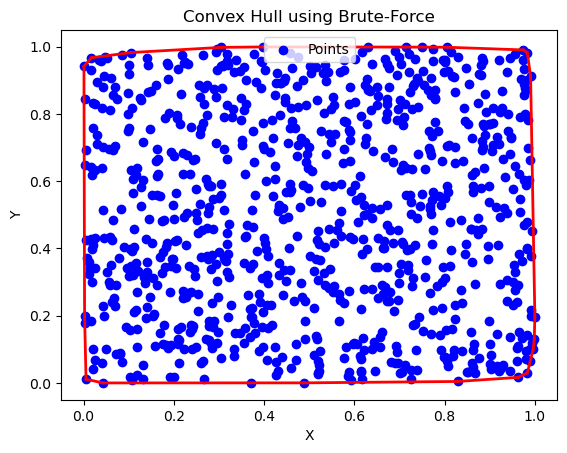

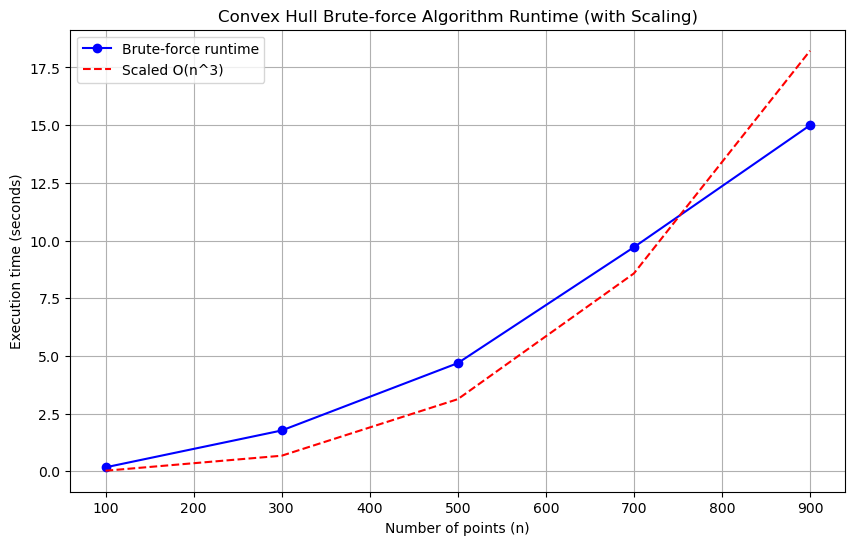

In [21]:
if __name__ == "__main__":
    # n_values = [5 * 10**i for i in range(1, 2)]
    n_values = [1 * 10**2, 3 * 10**2,5 * 10**2,7 * 10**2, 9 * 10**2]
    # n_values = [100]
    runtimes = measure_runtime(n_values)
    plot_runtime(n_values, runtimes)


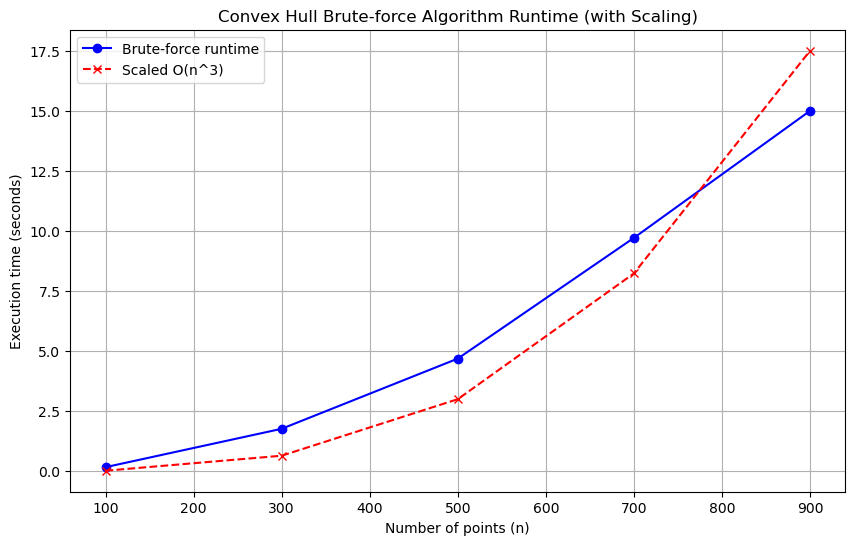

In [22]:
# Asymptotes: Scaling the O(n^3) curve to match the first measured runtime
n_cubed_scaled = [0.24 * (n**3)/(10**7) for n in n_values]

plt.figure(figsize=(10, 6))
plt.plot(n_values, runtimes, label="Brute-force runtime", marker="o", color="blue")
plt.plot(n_values, n_cubed_scaled, label="Scaled O(n^3)", linestyle="--", color="red",marker = 'x')

plt.xlabel("Number of points (n)")
plt.ylabel("Execution time (seconds)")
plt.title("Convex Hull Brute-force Algorithm Runtime (with Scaling)")
plt.legend()
# y scale in log
# plt.yscale('log')
plt.grid(True)
plt.show()